In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, hamming_loss
import joblib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving health_activity_data_25diseases.csv to health_activity_data_25diseases.csv


In [ ]:
df = pd.read_csv("health_activity_data_25diseases.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (1000, 46)
   ID  Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0   1   56    Male        164         81  30.72         5134             1796   
1   2   69    Male        156         82  20.86        12803             1650   
2   3   46  Female        158         65  30.93        16408             1756   
3   4   32    Male        197         87  31.19        18420             2359   
4   5   60    Male        157         63  29.37        17351             2556   

   Hours_of_Sleep  Heart_Rate  ... GERD  Migraine Chronic_Fatigue  PCOS  \
0             8.6         102  ...   No       Yes              No   Yes   
1             4.5         103  ...   No        No              No    No   
2             4.3          74  ...   No        No              No    No   
3             4.1         116  ...   No        No              No    No   
4             5.1         111  ...   No        No              No    No   

  Gallbladder_Disease Osteoporosis  

In [ ]:
# 2. Preprocessing
# Encode categorical columns
if "Gender" in df.columns:
    df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Male=1, Female=0

# Handle missing values in 'Smoker' before encoding
if "Smoker" in df.columns:
    df["Smoker"] = df["Smoker"].fillna("Unknown")  # Fill NaN with 'Unknown'
    df["Smoker"] = df["Smoker"].map({"Yes": 1, "No": 0, "Unknown": -1}) # Map 'Unknown' to -1

# Handle Blood Pressure column
if "Blood_Pressure" in df.columns:
    bp_split = df['Blood_Pressure'].str.split('/', expand=True)
    if bp_split.shape[1] == 2:  # Ensure proper split
        df['Systolic_Pressure'] = pd.to_numeric(bp_split[0], errors='coerce')
        df['Diastolic_Pressure'] = pd.to_numeric(bp_split[1], errors='coerce')
    df = df.drop('Blood_Pressure', axis=1)
else:
      # If Blood_Pressure column doesn't exist, initialize Systolic and Diastolic to None or 0
      df['Systolic_Pressure'] = None
      df['Diastolic_Pressure'] = None


# Define Features and Targets
feature_cols = [
    "Age", "Gender", "Height_cm", "Weight_kg", "BMI",
    "Daily_Steps", "Calories_Intake", "Hours_of_Sleep",
    "Heart_Rate", "Systolic_Pressure", "Diastolic_Pressure",
    "Exercise_Hours_per_Week", "Smoker", "Alcohol_Consumption_per_Week"
]

# Exclude numerical columns and ID from disease_cols
numerical_cols_in_disease = ['Calorie_Intake', 'Water_Intake', 'Sleep_Hours', 'Stress_Level', 'Physical_Activity', 'Systolic_BP']
disease_cols = [c for c in df.columns if c not in feature_cols and c not in ["ID"] and c not in numerical_cols_in_disease]

X = df[feature_cols]
y = df[disease_cols].copy()

# Convert Yes/No to 1/0 only if needed and fill any NaNs with 0, then convert to int
for col in disease_cols:
    if y[col].dtype == "object":  # only map if text
        y.loc[:, col] = y[col].map({"Yes": 1, "No": 0})
    # The FutureWarning is caused by the line below. It's fixed by using infer_objects().
    y.loc[:, col] = y[col].fillna(0).infer_objects(copy=False).astype(int) # Fill any NaNs with 0 and convert to int

# Drop rows with NaNs in features (excluding 'Smoker' which is handled)
X = X.dropna()
# Align y with X after dropping rows from X
y = y.loc[X.index]


print("Cleaned Features Shape:", X.shape)
print("Cleaned Targets Shape:", y.shape)

# Ensure Features and Targets are not empty
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Dataset is empty after preprocessing. Please check your CSV and preprocessing steps.")


/tmp/ipython-input-4008881138.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.loc[:, col] = y[col].fillna(0).infer_objects(copy=False).astype(int) # Fill any NaNs with 0 and convert to int
/tmp/ipython-input-4008881138.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.loc[:, col] = y[col].fillna(0).infer_objects(copy=False).astype(int) # Fill any NaNs with 0 and convert to int
/tmp/ipython-input-4008881138.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call r

Cleaned Features Shape: (1000, 14)
Cleaned Targets Shape: (1000, 26)


/tmp/ipython-input-4008881138.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.loc[:, col] = y[col].fillna(0).infer_objects(copy=False).astype(int) # Fill any NaNs with 0 and convert to int
/tmp/ipython-input-4008881138.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.loc[:, col] = y[col].fillna(0).infer_objects(copy=False).astype(int) # Fill any NaNs with 0 and convert to int
/tmp/ipython-input-4008881138.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call r

In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variables to NumPy array of integers
y_train_array = y_train.values.astype(int)
y_test_array = y_test.values.astype(int)


In [ ]:
# 4. Train Model
base_model = RandomForestClassifier(
    n_estimators=400, max_depth=20, random_state=42, n_jobs=-1
)
model = MultiOutputClassifier(base_model, n_jobs=-1)
model.fit(X_train_scaled, y_train_array)

print("\nModel trained successfully.")


Model trained successfully.



--- Model Evaluation ---
Overall Accuracy: 0.12
F1-Score (micro): 0.5159106296547055
Hamming Loss: 0.1375

Classification Report:
                     precision    recall  f1-score   support

           Diabetic       0.00      0.00      0.00        29
      Heart_Disease       0.00      0.00      0.00        14
            Smoking       0.55      0.55      0.55       109
       Hypertension       0.00      0.00      0.00         0
            Obesity       1.00      1.00      1.00        59
     Kidney_Disease       0.00      0.00      0.00         0
      Liver_Disease       0.00      0.00      0.00         0
             Asthma       0.55      0.55      0.55       109
             Stroke       0.00      0.00      0.00         0
        Cancer_Risk       0.55      0.55      0.55       109
         Depression       0.00      0.00      0.00        13
          Arthritis       0.00      0.00      0.00        15
         Alzheimers       0.00      0.00      0.00        23
   Thyroid_Dis

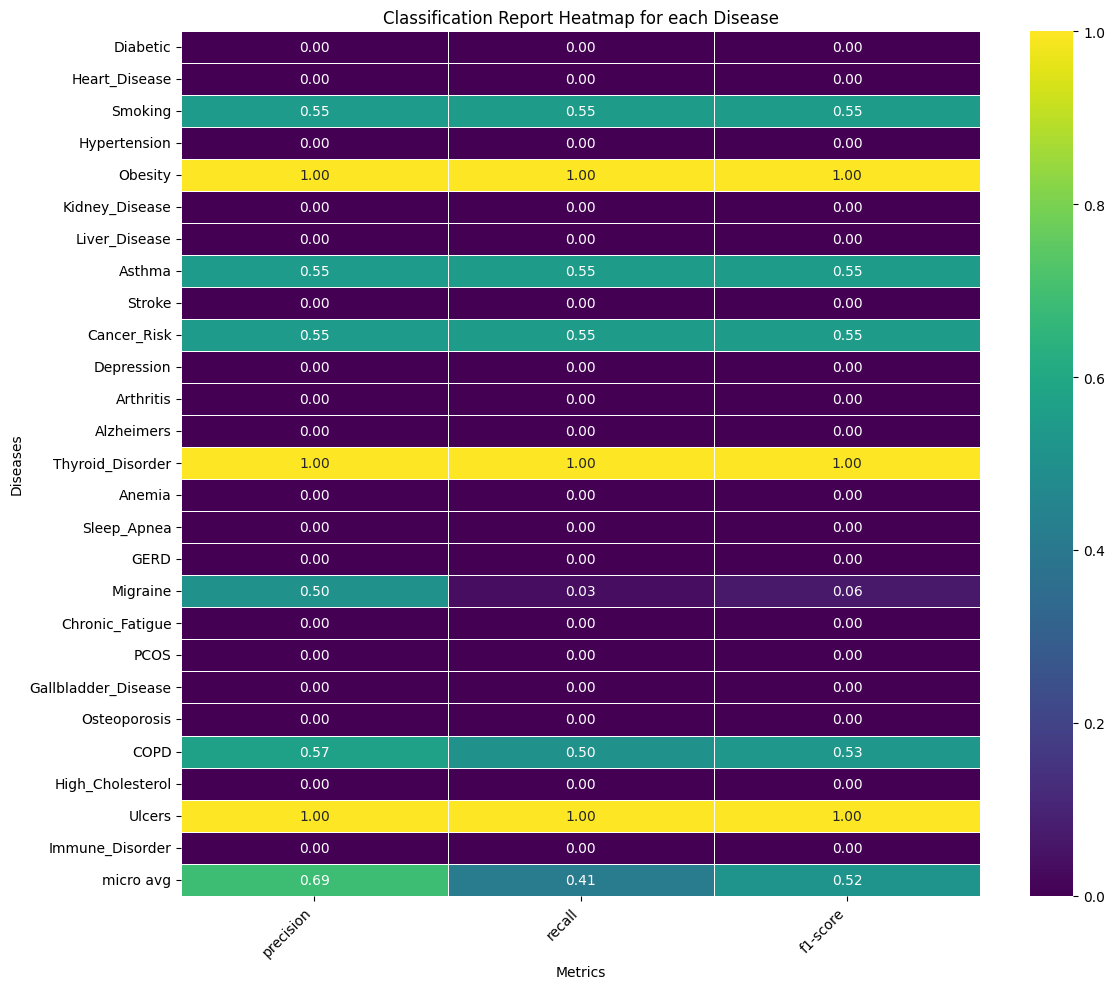

In [ ]:

# 5. Evaluate Model Performance using the imported metrics
print("\n--- Model Evaluation ---")
y_pred = model.predict(X_test_scaled)
print("Overall Accuracy:", accuracy_score(y_test_array, y_pred))
print("F1-Score (micro):", f1_score(y_test_array, y_pred, average='micro'))
print("Hamming Loss:", hamming_loss(y_test_array, y_pred))

# Generate and print classification report for each disease
print("\nClassification Report:")
print(classification_report(y_test_array, y_pred, target_names=disease_cols, zero_division=0))

# Visualize the classification report as a heatmap
report_dict = classification_report(y_test_array, y_pred, target_names=disease_cols, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.drop('support', axis=1) # Drop the 'support' row for a cleaner plot

plt.figure(figsize=(12, 10))
sns.heatmap(report_df.iloc[:-3, :].astype(float), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Classification Report Heatmap for each Disease")
plt.xlabel("Metrics")
plt.ylabel("Diseases")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# 6. Function to predict disease for new data
def predict_disease_single_input(model, scaler, feature_columns, disease_columns, user_data):
    """
    Predicts diseases for a single user input.

    Args:
        model: Trained MultiOutputClassifier model.
        scaler: Trained StandardScaler.
        feature_columns: List of feature column names.
        disease_columns: List of disease column names.
        user_data: Dictionary of user input data.

    Returns:
        A dictionary of predicted diseases (Yes/No).
    """
    user_df = pd.DataFrame([user_data], columns=feature_columns)

    # Scale the user input data using the *trained* scaler
    user_scaled = scaler.transform(user_df)

    # Make prediction
    prediction = model.predict(user_scaled)

    # Convert prediction to a readable format
    predicted_diseases = {}
    for i, disease in enumerate(disease_columns):
        predicted_diseases[disease] = "Yes" if prediction[0, i] == 1 else "No"

    return predicted_diseases

In [ ]:
# 7. Get user input and make prediction
print("\n--- Disease Prediction ---")
user_input_data = {}
print("Please enter the following information:")

for feature in feature_cols:
    try:
        if feature == 'Gender':
            user_input = input(f"Enter {feature} (Male/Female): ").strip().lower()
            user_input_data[feature] = 1 if user_input == 'male' else 0
        elif feature == 'Smoker':
            user_input = input(f"Enter {feature} (Yes/No/Unknown): ").strip().lower()
            if user_input == 'yes':
                user_input_data[feature] = 1
            elif user_input == 'no':
                user_input_data[feature] = 0
            else:
                user_input_data[feature] = -1  # Assuming -1 for Unknown
        elif feature in ['Systolic_Pressure', 'Diastolic_Pressure']:
              user_input_data[feature] = float(input(f"Enter {feature} (e.g., 120 for Systolic): "))
        else:
            user_input_data[feature] = float(input(f"Enter {feature}: "))
    except ValueError:
        print(f"Invalid input for {feature}. Please enter a numerical value or select from options.")
        user_input_data[feature] = np.nan # Use NaN for invalid numerical input

# Ensure all feature columns are present in user_input_data, fill missing with NaN if necessary
for feature in feature_cols:
    if feature not in user_input_data:
        user_input_data[feature] = np.nan

# Make prediction using the function
predicted_diseases_result = predict_disease_single_input(model, scaler, feature_cols, disease_cols, user_input_data)

print("\n--- Predicted Diseases ---")
predicted_yes = [disease for disease, prediction in predicted_diseases_result.items() if prediction == 'Yes']

if predicted_yes:
    print("Based on the provided information, the predicted potential diseases are:")
    for disease in predicted_yes:
        print(f"- {disease}")
else:
    print("Based on the provided information, no specific diseases were predicted.")



--- Disease Prediction ---
Please enter the following information:
Enter Age: 22
Enter Gender (Male/Female): Male
Enter Height_cm: 175
Enter Weight_kg: 87
Enter BMI: 28.4
Enter Daily_Steps: 2352
Enter Calories_Intake: 3456
Enter Hours_of_Sleep: 4
Enter Heart_Rate: 89
Enter Systolic_Pressure (e.g., 120 for Systolic): 119
Enter Diastolic_Pressure (e.g., 120 for Systolic): 120
Enter Exercise_Hours_per_Week: 0
Enter Smoker (Yes/No/Unknown): Yes
Enter Alcohol_Consumption_per_Week: 7

--- Predicted Diseases ---
Based on the provided information, the predicted potential diseases are:
- Thyroid_Disorder
